# GENDER SPECIFIC CAR CRASH ANALYSIS # 

Goal of this analysis to do a classification about type and severity of accidents done by male and female from various background.For the analysis I have used dataset RTA_dataset found on open source kaggle.Dataset highlights time,day,age sex,education level and driving experience of the driver as well as age 


The dataset contains information about road traffic accidents (RTA) involving various factors and the severity of the accidents. 

| Age_band_of_driver | Sex_of_driver | Educational_level | Vehicle_driver_relation | Driving_experience | Lanes_or_Medians | Types_of_Junction | Road_surface_type | Light_conditions | Weather_conditions | Type_of_collision | Vehicle_movement | Pedestrian_movement | Cause_of_accident | Accident_severity |
| ------------------ | ------------- | ----------------- | ----------------------- | ------------------ | ---------------- | ----------------- | ---------------- | ---------------- | ------------------ | ----------------- | ---------------- | ------------------- | ----------------- | ----------------- |

The dataset includes the following columns:

* `Age_band_of_driver`: Age band of the driver involved in the accident
* `Sex_of_driver`: Sex of the driver involved in the accident
* `Educational_level`: Educational level of the driver
* `Vehicle_driver_relation`: Relation of the driver to the vehicle (e.g., owner, passenger)
* `Driving_experience`: Experience of the driver in terms of years
* `Lanes_or_Medians`: Types of lanes or medians on the road where the accident occurred
* `Types_of_Junction`: Types of junctions where the accident occurred
* `Road_surface_type`: Type of road surface at the location of the accident
* `Light_conditions`: Light conditions during the time of the accident
* `Weather_conditions`: Weather conditions during the time of the accident
* `Type_of_collision`: Type of collision involved in the accident
* `Vehicle_movement`: Movement status of the vehicle during the accident
* `Pedestrian_movement`: Movement status of any pedestrians involved in the accident
* `Cause_of_accident`: Probable cause of the accident
* `Accident_severity`: Severity of the accident

The primary objective of this dataset is to predict the sex of the driver involved in the accident based on the various features provided.


In [44]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Reading the RTA dataset from the CSV file
RTA_dataset = pd.read_csv("RTA_dataset.csv")

# Displaying the first few rows of the dataset
RTA_dataset.head() 


,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [45]:
#to check no. of rows and columns in unfiltered RTA_dataset
RTA_dataset.shape

(12316, 16)

In [ ]:
# Dropping the 'Time' column from the dataset
RTA_column = RTA_dataset.drop('Time', axis=1)

# Displaying the first few rows of the dataset
RTA_column.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [50]:
#To check the data type
RTA_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        11575 non-null  object
 3   Vehicle_driver_relation  11737 non-null  object
 4   Driving_experience       11487 non-null  object
 5   Lanes_or_Medians         11931 non-null  object
 6   Types_of_Junction        11429 non-null  object
 7   Road_surface_type        12144 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12161 non-null  object
 11  Vehicle_movement         12008 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [5]:
# Deal with the NaN values in the data
RTA_column.isna().sum()

Age_band_of_driver           0
Sex_of_driver                0
Educational_level          741
Vehicle_driver_relation    579
Driving_experience         829
Lanes_or_Medians           385
Types_of_Junction          887
Road_surface_type          172
Light_conditions             0
Weather_conditions           0
Type_of_collision          155
Vehicle_movement           308
Pedestrian_movement          0
Cause_of_accident            0
Accident_severity            0
dtype: int64

###### We dop null values before building a regression model is a common practice to ensure the quality and integrity of the data.Moreover training and testing data require all the values else it will give a error and these missing values may lead to biased estimates and inaccurate results.

In [6]:
# clean the data by dropping NaN values
RTA_data= RTA_dataset.dropna()

In [52]:
#to check no. of rows and columns in unfiltered RTA_dataset
RTA_data.shape

(9587, 31)

In [53]:
# Creating a cross-tabulation of gender and accident severity
gender = pd.crosstab(index=RTA_data['Sex_of_driver'].loc[RTA_data['Sex_of_driver'] != "Unknown"], columns=RTA_data['Accident_severity'], margins=True)

# Printing the cross-tabulation
print(gender)

# Computing the conditional probability of gender given severity is fatal
print("P(Gender = Female | Severity = Fatal) = " + str((gender.iloc[0,2])/(gender.iloc[0,3]*1.0)))
print("P(Gender = Male | Severity = Fatal) = " + str((gender.iloc[1,2])/(gender.iloc[1,3]*1.0)))


Accident_severity  Fatal injury  Serious Injury  Slight Injury   All
Sex_of_driver                                                       
Female                        3              74            459   536
Male                        107            1238           7558  8903
All                         110            1312           8017  9439
P(Gender = Female | Severity = Fatal) = 0.8563432835820896
P(Gender = Male | Severity = Fatal) = 0.8489273278670111


The cross-tabulation table displays the count of different accident severities for both male and female drivers. Here are the key takeaways:

1. There were 110 accidents in total, out of which 3 were fatal for female drivers, and 107 were fatal for male drivers.
2. For female drivers, there were 74 accidents resulting in serious injuries and 459 resulting in slight injuries.
3. For male drivers, there were 1238 accidents resulting in serious injuries and 7558 resulting in slight injuries.
4. In total, there were 9439 accidents recorded.

Conditional Probability values suggest that the likelihood of an accident resulting in a fatal injury is slightly higher for female drivers (85.63%) compared to male drivers (84.89%). However, the difference is not significant.

Text(0, 0.5, 'Frequency')

<Figure size 792x792 with 0 Axes>

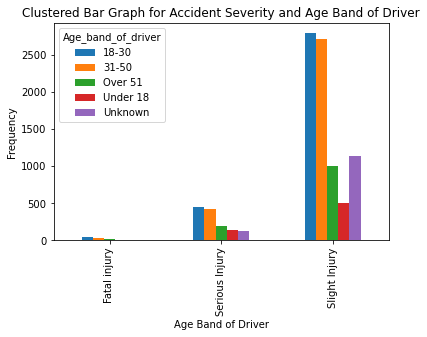

In [46]:
# Group data based on 'Accident_severity' and 'Age_band_of_driver' columns
grouped_data = RTA_data.groupby(['Accident_severity', 'Age_band_of_driver']).size().unstack()

# Plotting the clustered bar graph
plt.figure(figsize=(11,11))
grouped_data.plot(kind='bar', stacked=False)
plt.title('Clustered Bar Graph for Accident Severity and Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Frequency')

The above cluster graph suggests that :
1. Slight injuries are most frequent as compared to serious and fatal that are too low.
2. Youngsters are the highest among whole age band.Followed by people of age 31-50.


#### Label encoding 
Label encoding is employed to convert categorical data into a numerical format that can be comprehended by machine learning models. It simplifies the data representation and facilitates model training.

In [55]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
enc = LabelEncoder()

# Applying label encoding to multiple columns in the RTA_data DataFrame
columns_to_encode = ["Age_band_of_driver", "Sex_of_driver", "Educational_level", "Vehicle_driver_relation",
                     "Driving_experience", "Lanes_or_Medians", "Types_of_Junction", "Road_surface_type",
                     "Light_conditions", "Weather_conditions", "Type_of_collision", "Vehicle_movement",
                     "Pedestrian_movement", "Cause_of_accident", "Accident_severity"]

for col in columns_to_encode:
    RTA_data[col+"_code"] = enc.fit_transform(RTA_data[col])

# Displaying the encoded data for the first 10 rows
RTA_data[["Age_band_of_driver_code","Age_band_of_driver","Sex_of_driver_code","Sex_of_driver", "Educational_level_code", "Educational_level",
          "Vehicle_driver_relation_code","Vehicle_driver_relation","Driving_experience_code",
          "Driving_experience",  "Lanes_or_Medians_code","Lanes_or_Medians","Types_of_Junction_code", "Types_of_Junction",
          "Road_surface_type_code", "Road_surface_type", "Light_conditions_code","Light_conditions", "Weather_conditions_code","Weather_conditions",
          "Type_of_collision_code","Type_of_collision", "Vehicle_movement_code", "Vehicle_movement", "Pedestrian_movement_code","Pedestrian_movement",
          "Cause_of_accident_code","Cause_of_accident", "Accident_severity","Accident_severity_code"]].head(10)


,Age_band_of_driver_code,Age_band_of_driver,Sex_of_driver_code,Sex_of_driver,Educational_level_code,Educational_level,Vehicle_driver_relation_code,Vehicle_driver_relation,Driving_experience_code,Driving_experience,...,Type_of_collision_code,Type_of_collision,Vehicle_movement_code,Vehicle_movement,Pedestrian_movement_code,Pedestrian_movement,Cause_of_accident_code,Cause_of_accident,Accident_severity,Accident_severity_code
1,1,31-50,1,Male,4,Junior high school,0,Employee,3,Above 10yr,...,8,Vehicle with vehicle collision,2,Going straight,5,Not a Pedestrian,16,Overtaking,Slight Injury,2
2,0,18-30,1,Male,4,Junior high school,0,Employee,0,1-2yr,...,2,Collision with roadside objects,2,Going straight,5,Not a Pedestrian,0,Changing lane to the left,Serious Injury,1
3,0,18-30,1,Male,4,Junior high school,0,Employee,2,5-10yr,...,8,Vehicle with vehicle collision,2,Going straight,5,Not a Pedestrian,1,Changing lane to the right,Slight Injury,2
4,0,18-30,1,Male,4,Junior high school,0,Employee,1,2-5yr,...,8,Vehicle with vehicle collision,2,Going straight,5,Not a Pedestrian,16,Overtaking,Slight Injury,2
7,0,18-30,1,Male,4,Junior high school,0,Employee,1,2-5yr,...,8,Vehicle with vehicle collision,10,U-Turn,5,Not a Pedestrian,12,No priority to vehicle,Slight Injury,2
8,0,18-30,1,Male,4,Junior high school,0,Employee,3,Above 10yr,...,3,Collision with roadside-parked vehicles,2,Going straight,0,Crossing from driver's nearside,1,Changing lane to the right,Slight Injury,2
9,0,18-30,1,Male,4,Junior high school,0,Employee,0,1-2yr,...,3,Collision with roadside-parked vehicles,10,U-Turn,5,Not a Pedestrian,9,Moving Backward,Serious Injury,1
10,0,18-30,1,Male,0,Above high school,2,Owner,0,1-2yr,...,0,Collision with animals,9,Turnover,5,Not a Pedestrian,0,Changing lane to the left,Serious Injury,1
11,1,31-50,1,Male,0,Above high school,0,Employee,5,No Licence,...,0,Collision with animals,2,Going straight,5,Not a Pedestrian,11,No priority to pedestrian,Serious Injury,1
12,0,18-30,1,Male,4,Junior high school,0,Employee,0,1-2yr,...,0,Collision with animals,2,Going straight,5,Not a Pedestrian,10,No distancing,Slight Injury,2


Text(0, 0.5, 'Severity Mean')

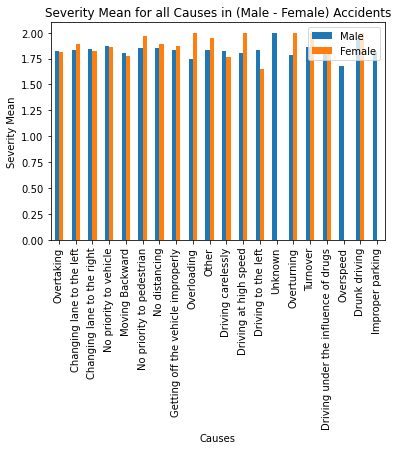

In [56]:
import matplotlib.pyplot as plt

# Grouping data by 'Cause_of_accident' and finding the mean of 'Accident_severity_code' for males and females
dataMF = {
    "Male": RTA_data.where(RTA_data["Sex_of_driver"] == "Male").groupby(['Cause_of_accident'])['Accident_severity_code'].mean(),
    "Female": RTA_data.where(RTA_data["Sex_of_driver"] == "Female").groupby(['Cause_of_accident'])['Accident_severity_code'].mean()
}

# Creating a DataFrame from the grouped data
plotdata = pd.DataFrame(dataMF, index=RTA_data['Cause_of_accident'].unique())

# Plotting the data as a bar plot
plotdata.plot(kind="bar")
plt.title("Severity Mean for all Causes in (Male - Female) Accidents")
plt.xlabel("Causes")
plt.ylabel("Severity Mean")

# Adding a comment about the output
# The bar plot depicts the average severity of accidents for different causes, distinguishing between males and females. 
# The plot enables the comparison of the average severity of accidents between genders for each specific cause.


From this Graph it shows that at some causes, the mean of severity of accidents done by female drivers reaches its maximum

Graph conclude that :
1. Female and male are mostly equivalent in severity of accidents which might be caused by different issues.
2. No female are found to have severe accident due to improper parking and speeding.
3. Men are the one who suffers a accident due to speeding and other issues equivalent to woman.
4. Mean severity is mostlyy equal for all the causes of accident.


In [57]:
#extracting the only code columns for further analysis
RTA_code= RTA_data[["Age_band_of_driver_code","Sex_of_driver_code","Educational_level_code",
          "Vehicle_driver_relation_code","Driving_experience_code",
          "Lanes_or_Medians_code","Types_of_Junction_code",
          "Road_surface_type_code","Light_conditions_code",
          "Weather_conditions_code","Type_of_collision_code",
          "Vehicle_movement_code","Pedestrian_movement_code",
          "Cause_of_accident_code","Accident_severity_code"]]

RTA_code.head()


,Age_band_of_driver_code,Sex_of_driver_code,Educational_level_code,Vehicle_driver_relation_code,Driving_experience_code,Lanes_or_Medians_code,Types_of_Junction_code,Road_surface_type_code,Light_conditions_code,Weather_conditions_code,Type_of_collision_code,Vehicle_movement_code,Pedestrian_movement_code,Cause_of_accident_code,Accident_severity_code
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,2
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0,1
3,0,1,4,0,2,6,7,2,0,2,8,2,5,1,2
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16,2
7,0,1,4,0,1,6,7,0,3,2,8,10,5,12,2


### Correlation among all features
Then we show correlation among all the features to illustrate the correlation matrix that aids in understanding the relationships between various features in the dataset. It helps identify potential multicollinearity issues and provides insights into how different features influence the target variable. Recognizing these patterns beforehand ensures a better-informed feature selection and model building process, leading to more accurate and interpretable results.

In [58]:
# Compute the absolute correlation matrix for the RTA_code DataFrame
RTA_code.corr().abs()

,Age_band_of_driver_code,Sex_of_driver_code,Educational_level_code,Vehicle_driver_relation_code,Driving_experience_code,Lanes_or_Medians_code,Types_of_Junction_code,Road_surface_type_code,Light_conditions_code,Weather_conditions_code,Type_of_collision_code,Vehicle_movement_code,Pedestrian_movement_code,Cause_of_accident_code,Accident_severity_code
Age_band_of_driver_code,1.000000,0.369513,0.021182,0.007334,0.021288,0.006450,0.018636,0.001371,0.006426,0.023472,0.003111,0.002633,0.008031,0.003720,0.016259
Sex_of_driver_code,0.369513,1.000000,0.000286,0.005458,0.009573,0.014115,0.003428,0.000775,0.044582,0.006099,0.024623,0.001591,0.007924,0.005452,0.000307
Educational_level_code,0.021182,0.000286,1.000000,0.079464,0.055635,0.008909,0.020585,0.014668,0.002084,0.007002,0.013204,0.008650,0.000726,0.001317,0.002746
Vehicle_driver_relation_code,0.007334,0.005458,0.079464,1.000000,0.001870,0.005491,0.024513,0.002671,0.002318,0.022577,0.009970,0.003427,0.012913,0.013970,0.010572
Driving_experience_code,0.021288,0.009573,0.055635,0.001870,1.000000,0.018175,0.007900,0.024485,0.020164,0.000288,0.017165,0.005930,0.013227,0.008681,0.003370
Lanes_or_Medians_code,0.006450,0.014115,0.008909,0.005491,0.018175,1.000000,0.001876,0.027545,0.005394,0.008584,0.016031,0.000680,0.004524,0.015761,0.016769
Types_of_Junction_code,0.018636,0.003428,0.020585,0.024513,0.007900,0.001876,1.000000,0.002505,0.036678,0.015098,0.003983,0.013752,0.009852,0.001127,0.000513
Road_surface_type_code,0.001371,0.000775,0.014668,0.002671,0.024485,0.027545,0.002505,1.000000,0.016641,0.001208,0.034701,0.004485,0.001989,0.012979,0.004641
Light_conditions_code,0.006426,0.044582,0.002084,0.002318,0.020164,0.005394,0.036678,0.016641,1.000000,0.055307,0.008152,0.024063,0.013910,0.004831,0.027298
Weather_conditions_code,0.023472,0.006099,0.007002,0.022577,0.000288,0.008584,0.015098,0.001208,0.055307,1.000000,0.013402,0.008115,0.017178,0.000131,0.010603


* The correlation between the age band of the driver and the sex of the driver is moderately positive, indicating that certain age groups might have a higher proportion of a particular gender.
* Light conditions and weather conditions are also moderately positively correlated, suggesting that certain types of weather might coincide with specific light conditions during accidents.
* Accident severity and driving experience have a weak correlation, implying that there might not be a strong relationship between the severity of an accident and the driver's level of experience.
* Several other features show weak correlations, indicating that they might not have significant linear relationships with each other.

Understanding these correlations helps in determining which features might have a more significant impact on predicting the sex of the driver and can guide feature selection and engineering for building a robust predictive model.







### Heatmap
A heatmap is a graphical representation of data where values are depicted by color. In the context of a correlation matrix, a heatmap provides a visual representation of the correlation between different variables. The significance of a heatmap lies in its ability to quickly identify patterns and relationships within the data. By using colors to represent the strength of the correlation, it allows users to identify strong and weak correlations easily, aiding in the identification of potential patterns, trends, and associations between variables. 

<AxesSubplot:>

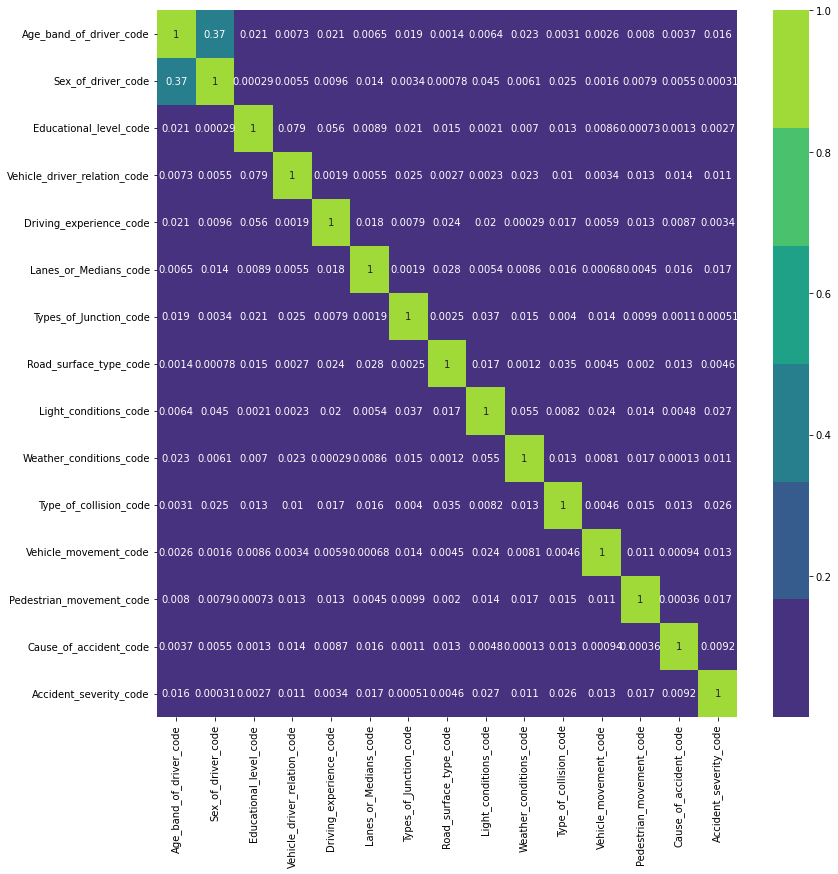

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use the Viridis colormap
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(RTA_code.corr().abs(), cmap=cmap, annot=True)


#The Viridis palette is known for its perceptual uniformity and accessibility.


### LOGISTIC REGRESSION
Logistic regression is a statistical method used for modeling the probability of a binary outcome. It is particularly useful when the dependent variable is categorical just like sex of the driver thats why I have used this feature.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [59]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with 20% for testing data and a random state of 142
train,test = train_test_split(RTA_code, test_size=0.2, random_state=142)

# Printing the shapes of the training and testing data
print("Shape of training data when test is 20% of the entire data:", train.shape)
print("Shape of testing data when train is 80% of the entire data:", test.shape)



Shape of training data when test is 20% of the entire data: (7669, 15)
Shape of testing data when train is 80% of the entire data: (1918, 15)


In [60]:
# Calculating the correlation of RTA_code and sorting the values
RTA_code_severity = RTA_code.corr().abs().unstack().sort_values()

# Printing the correlation value for the variable "Sex_of_driver_code"
print(RTA_code_severity["Sex_of_driver_code"])


Educational_level_code          0.000286
Accident_severity_code          0.000307
Road_surface_type_code          0.000775
Vehicle_movement_code           0.001591
Types_of_Junction_code          0.003428
Cause_of_accident_code          0.005452
Vehicle_driver_relation_code    0.005458
Weather_conditions_code         0.006099
Pedestrian_movement_code        0.007924
Driving_experience_code         0.009573
Lanes_or_Medians_code           0.014115
Type_of_collision_code          0.024623
Light_conditions_code           0.044582
Age_band_of_driver_code         0.369513
Sex_of_driver_code              1.000000
dtype: float64


Certainly, the correlation values provide insights into the relationships between the different features and the Sex_of_driver The values indicate that the Age_band_of_driver has a moderate positive correlation, suggesting that certain age groups might exhibit a higher likelihood of a specific gender being the driver.

Additionally, the low correlation values of other features such as Educational_level and Weather_conditions with Sex_of_driver indicate that these factors might not play a significant role in determining the gender of the driver in the context of the dataset. Further analysis could involve exploring these variables' impact through statistical tests and feature importance techniques.

In [63]:
# Defining the feature columns including all the available features
feature_cols_a= ["Age_band_of_driver_code","Educational_level_code",
          "Vehicle_driver_relation_code","Driving_experience_code",
          "Lanes_or_Medians_code","Types_of_Junction_code",
          "Road_surface_type_code","Light_conditions_code",
          "Weather_conditions_code","Type_of_collision_code",
          "Vehicle_movement_code","Pedestrian_movement_code",
          "Cause_of_accident_code",'Accident_severity_code']

# Extracting the feature and target variables
X_a= RTA_code[feature_cols_a]
y_a = RTA_code["Sex_of_driver_code"]

# Splitting the data into training and testing sets
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a,test_size=0.8,random_state=142) #10% for train

# Displaying the shapes of the training and testing sets
print(X_train_a.shape, X_test_a.shape,y_train_a.shape, y_test_a.shape)

# Initializing a logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train_a, y_train_a)

# Predicting the target variable for the test and train sets
y_pred_test_a = model.predict(X_test_a)
y_pred_train_a = model.predict(X_train_a)

# Evaluating the model's performance by computing the accuracy scores
print("Accuracy score on the testing set: ", accuracy_score(y_test_a, y_pred_test_a))
print("Accuracy score on the training set: ", accuracy_score(y_train_a, y_pred_train_a))


(1917, 14) (7670, 14) (1917,) (7670,)
Accuracy score on the testing set:  0.927509778357236
Accuracy score on the training set:  0.9321857068335941



The testing and training data accuracy can provide valuable insights into the fitness of the logistic regression model.

1. High training set accuracy (93.22%) suggests that the model has been able to learn from the training data and capture the underlying patterns to a significant extent.

2. High testing set accuracy (92.75%) indicates that the model is able to generalize well to unseen data, thereby making accurate predictions on data it hasn't encountered during training.

In this case, the high accuracies on both sets suggest that the model is performing well and has a good fit for the given dataset. Also, there is a very small gap in the accuracy scores for training and testing set, so there is no overfitting of the model.

In [61]:
# Selecting the feature columns that are highly correlated
feature_cols_2 = ["Age_band_of_driver_code", "Light_conditions_code"]

# Assigning the features and the target variable to X_2 and y_2
X_2 = RTA_code[feature_cols_2]
y_2 = RTA_code["Sex_of_driver_code"]

# Splitting the data into training and testing sets with a test size of 80% and random state 142
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.8, random_state=142) 

# Printing the shapes of the training and testing data
print(X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape)


(1917, 2) (7670, 2) (1917,) (7670,)


In [62]:
# Initializing a logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train_2, y_train_2)

# Predicting the target variable for the test and train sets
y_pred_test_2 = model.predict(X_test_2)
y_pred_train_2 = model.predict(X_train_2)

# Evaluating the model's performance by computing the accuracy scores
print("Accuracy score on the testing set: ", accuracy_score(y_test_2, y_pred_test_2))
print("Accuracy score on the training set: ", accuracy_score(y_train_2, y_pred_train_2))


Accuracy score on the testing set:  0.9280312907431552
Accuracy score on the training set:  0.9311424100156495


The accuracy scores obtained after utilizing the top two most correlated features with the target variable Sex_of_driver, are quite similar to the results from using all features. The high accuracy scores on both the training and testing sets suggest that the model is able to make accurate predictions on both seen and unseen data.

This implies that the two selected features have a strong relationship with the target variable, which contributes significantly to the model's predictive capability. However, it's important to consider the potential impact of using a reduced feature set on the overall complexity and interpretability of the model. Further analysis and evaluation are required to ensure that the model is not oversimplified and to assess its performance using other metrics.

### RFE
Recursive Feature Elimination (RFE) is a feature selection technique that recursively selects the most important features based on their contribution to the model's performance. RFE helps in identifying the most relevant features and discarding the least important ones, thus reducing overfitting and improving model interpretability and generalization. By iteratively removing features, RFE assists in simplifying the model without sacrificing its predictive power, ultimately leading to a more efficient and accurate model.

In [21]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [76]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
X= RTA_code[feature_cols_a]
y= RTA_code["Sex_of_driver_code"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8,random_state=142) #10% for train
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(1917, 14) (7670, 14) (1917,) (7670,)


In [83]:
# doing evaluation
y_test_pred = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_pred))

accuracy score on test set:  0.927509778357236


In [84]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000


In [79]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,15):
    clf =LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("acc on test set using", i, "features: ", f"{acc_score:.6f}")#f"{value:.2f}" 
    # append to the list
    acc_scores.append(acc_score)

acc on test set using 1 features:  0.928031
acc on test set using 2 features:  0.928031
acc on test set using 3 features:  0.928031
acc on test set using 4 features:  0.928031
acc on test set using 5 features:  0.927901
acc on test set using 6 features:  0.927640
acc on test set using 7 features:  0.927510
acc on test set using 8 features:  0.927379
acc on test set using 9 features:  0.927510
acc on test set using 10 features:  0.927510
acc on test set using 11 features:  0.927901
acc on test set using 12 features:  0.928031
acc on test set using 13 features:  0.927640
acc on test set using 14 features:  0.927510


The results of the Recursive Feature Elimination (RFE) analysis suggest that the model's accuracy on the test set remains relatively stable as the number of features increases. However, there is a slight variation in the accuracy scores, indicating that the inclusion of certain features contributes more significantly to the model's predictive power. RFE helps identify the optimal subset of features, ensuring the model's efficiency and performance.

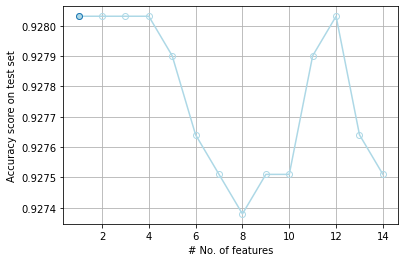

In [25]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1,15):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item > acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 15), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue'
         , markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

Graph depicts that accuracy from feature 1 to 4 and at 12 is highest and same.Although there is not much difference in the accuracy was the other features as well that concludes all features helps to depict the gender of the driver accurately.

### KNN

K-Nearest Neighbors (KNN) is a simple yet powerful classification algorithm used for both regression and classification tasks. It works by finding the k-nearest data points in the training set to a given test data point and using the most common class among those neighbors as the prediction for the test point. KNN is significant due to its simplicity and ease of implementation, making it a popular choice for various classification tasks, especially in scenarios where the decision boundary is irregular. However, it can be sensitive to the choice of the number of neighbors (k) and may suffer from the curse of dimensionality in high-dimensional spaces.

In [26]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [27]:
# Split your data into training(80%) and testing data (20%) and use random_state=142

feature_cols_k= ["Age_band_of_driver_code","Educational_level_code",
          "Vehicle_driver_relation_code","Driving_experience_code",
          "Lanes_or_Medians_code","Types_of_Junction_code",
          "Road_surface_type_code","Light_conditions_code",
          "Weather_conditions_code","Type_of_collision_code",
          "Vehicle_movement_code","Pedestrian_movement_code",
          "Cause_of_accident_code",'Accident_severity_code']
X_k= RTA_code[feature_cols_k]
y_k= RTA_code["Sex_of_driver_code"]
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k,test_size=0.8,random_state=142) #10% for train
print(X_train_k.shape, X_test_k.shape,y_train_k.shape, y_test_k.shape)

(1917, 14) (7670, 14) (1917,) (7670,)


In [28]:
# Creating and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train_k, y_train_k)

# Using the model to predict testing data
y_pred_k = clf.predict(X_test_k)
accuracy = accuracy_score(y_pred_k, y_test_k)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.9280312907431552


An accuracy score of 0.928 indicates that the KNN model correctly predicted the class labels for approximately 92.8% of the instances in the test set. This implies that the model is fairly accurate in its predictions, performing well in classifying the data points based on the chosen K-nearest neighbors algorithm.

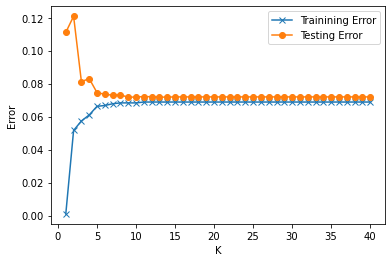

In [29]:
# Plotting the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train_k, y_train_k)
    training_error.append(1.0-accuracy_score(clf.predict(X_train_k), y_train_k))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test_k), y_test_k))

# Plotting the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

### GridSearch CV
Grid search cross-validation (CV) is a technique used for tuning hyperparameters of machine learning models. It performs an exhaustive search over a specified parameter grid to determine the best parameters for the model. By evaluating the model performance across different parameter values, grid search CV helps identify the optimal combination that yields the highest accuracy, enabling the selection of the best model configuration for a given dataset.

In [30]:
from sklearn.model_selection import GridSearchCV
# Defining search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Creating the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identifying the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  11
The accuracy:  0.9289669780412355


The grid search CV analysis determined that the optimal value for the parameter K in the KNN algorithm is 11, resulting in an accuracy of approximately 92.9%. This finding suggests that with 11 as the value for K, the KNN model achieved the highest accuracy among the tested values, making it the most suitable choice for the dataset.

### Multinomial NB
Multinomial Naive Bayes (NB) is a variant of the Naive Bayes algorithm that is suitable for classification tasks involving discrete features (e.g., word counts for text classification). Its significance lies in its simplicity, speed, and efficiency in handling large feature spaces. Despite its "naive" assumption of feature independence, Multinomial NB often performs well in practice, especially in text classification tasks. It is particularly useful for problems involving multiple classes and discrete features with counts, making it a popular choice for tasks like document classification, spam filtering, and sentiment analysis

In [65]:
from sklearn.naive_bayes import MultinomialNB

feature_cols_g= ["Age_band_of_driver_code","Educational_level_code",
          "Vehicle_driver_relation_code","Driving_experience_code",
          "Lanes_or_Medians_code","Types_of_Junction_code",
          "Road_surface_type_code","Light_conditions_code",
          "Weather_conditions_code","Type_of_collision_code",
          "Vehicle_movement_code","Pedestrian_movement_code",
          "Cause_of_accident_code",'Accident_severity_code']
X_g= RTA_code[feature_cols_g]
y_g= RTA_code["Sex_of_driver_code"]
# Data split
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g,y_g, test_size=.2, random_state=42)

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_g, y_train_g)
# Evaluate the model
y_pred_g = clf_mnb.predict(X_test_g)
accuracy_g = accuracy_score(y_test_g, y_pred_g)
print('Accuracy is: %.4f\n' % accuracy_g)

Accuracy is: 0.9270



An accuracy score of 0.9270 indicates that the Multinomial Naive Bayes model has performed well in predicting the classes of the dataset. This accuracy score suggests that the model is able to correctly predict the outcome for approximately 92.70% of the instances in the dataset. 

#### Estimating the probability of getting a class and estimating class connditional probability of each feature

In [73]:
# Using unique() method
unique_classes = RTA_data['Sex_of_driver'].unique()
print("Unique classes:", unique_classes)

# Using value_counts() method
class_counts = RTA_data['Sex_of_driver'].value_counts()
print("Class counts:\n", class_counts)


Unique classes: ['Male' 'Female' 'Unknown']
Class counts:
 Male       8903
Female      536
Unknown     148
Name: Sex_of_driver, dtype: int64


Though the dataset is highly dominated by men and women are just 5% of total of men.May cause higher chance of male but estimating probability is a better way to predict

In [74]:
from sklearn.naive_bayes import MultinomialNB

print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-codiitional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_) 

Estimated probability of classess: 
 [0.05590904 0.92865338 0.01543757]
Estimated class-codiitional probabilities for each feature: 
 [[0.0841438  0.07372352 0.00699027 0.0445033  0.07142237 0.07615491
  0.00386419 0.04298367 0.05744182 0.15374262 0.06673324 0.11219173
  0.16303404 0.04307051]
 [0.0290983  0.07767579 0.00805978 0.04741145 0.0731529  0.0837414
  0.00429855 0.05386482 0.05971993 0.15665334 0.07138307 0.11922105
  0.1704242  0.04529541]
 [0.02758504 0.08055509 0.0076155  0.05229311 0.07277035 0.07903199
  0.00389237 0.05093925 0.06160095 0.15247927 0.07158572 0.12286343
  0.16957184 0.04721611]]


In the multinomial Naive Bayes analysis, the estimated probability of classes is [0.05590904, 0.92865338, 0.01543757], corresponding to the three classesi.e men,women and unknown with highest probability of women being the predicted class.

Additionally, the estimated class-conditional probabilities for each feature display the likelihood of different features belonging to the classes. This information helps in understanding the influence of individual features on the classification process.

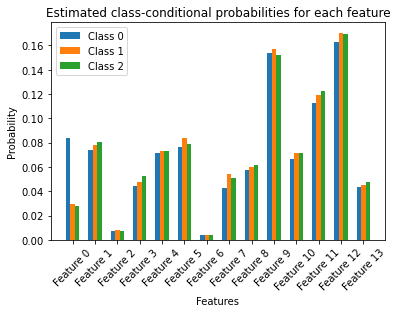

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined clf_mnb and other necessary variables
features = np.arange(len(clf_mnb.feature_log_prob_[0]))

# Plotting the class-conditional probabilities for each feature
for i in range(len(clf_mnb.feature_log_prob_)):
    plt.bar(features + 0.2*i, np.e**clf_mnb.feature_log_prob_[i], width=0.2, label=f'Class {i}')

plt.xlabel('Features')
plt.ylabel('Probability')
plt.title('Estimated class-conditional probabilities for each feature')
plt.xticks(features + 0.2, [f'Feature {i}' for i in features], rotation=45)  # Rotate the x-axis labels
plt.legend()


In [ ]:
"Age_band_of_driver_code","Educational_level_code",
          "Vehicle_driver_relation_code","Driving_experience_code",
          "Lanes_or_Medians_code","Types_of_Junction_code",
          "Road_surface_type_code","Light_conditions_code",
          "Weather_conditions_code","Type_of_collision_code",
          "Vehicle_movement_code","Pedestrian_movement_code",
          "Cause_of_accident_code",'Accident_severity_code']

Above graph depicts which feature has a greater probability predicting which class it is i.e who did the accident men or women7.
1. Feature 9 (type of collison ) and Feature 11 (pedestrian movement) shows the highest probability of estimating in all he 3 classes.

2. The lowest estimation probability is of feature 1(Education Level) and feature 6 (Road Surface).

3. An unusal trend can be seen in feature 0 (age band of driver) which estimates that males did the most car crash and their is high difference in male and female estimation probability of class.



## Conclusion
Analyzing the performance of different models in predicting the gender (sex) variable is crucial for understanding the effectiveness of each method.
1. Logistic Regression: Achieved an accuracy of 92.80% in predicting the gender variable. The model uses a logistic function to model the probability of a binary outcome, making it suitable for binary classification tasks like predicting gender.

2. K-Nearest Neighbors (KNN): Achieved an accuracy of 92.80% after selecting the best K value as 11 using GridSearchCV. The KNN algorithm classifies new data points based on the majority class of their K nearest neighbors. In this analysis, the value of K was crucial in achieving optimal accuracy.

3. Multinomial Naive Bayes: Achieved an accuracy of 92.70% in predicting the gender variable. The Multinomial Naive Bayes algorithm is commonly used for text classification and is suitable for datasets with discrete features such as word counts. In this case, it was used for the classification of gender based on various features.

Based on the analysis, all three models, namely Logistic Regression, K-Nearest Neighbors (KNN), and Multinomial Naive Bayes, exhibited similar high levels of accuracy in predicting the gender variable, with accuracies ranging between 92.70% and 92.80%. Given the similarity in performance, it is challenging to definitively determine the best model solely based on accuracy.

Though both genders are equally responsible of car crash cases.

In [2]:
#niyati niyati
#47943319